Chapter 6

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from tqdm import tqdm

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# 6.1
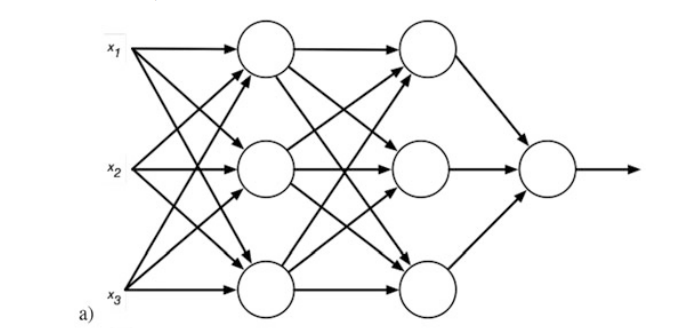 a) - Show empirically that the information limit of 2 prediction bits per parameter also holds for nearest neighbors.


In [ ]:

# d = dimension of data point
# n = number of points we saved as reference points
d_values = [2] # Representing the dimension of data
n_values = [2**d for d in d_values] # Representing the number of rows

In [193]:
np.random.seed(1)
neigh = KNeighborsClassifier(n_neighbors=1)
d_values = [2, 4, 8] # Representing the dimension of data
n_values = [2**d for d in d_values] # Representing the number of rows
n_avg = []
n_totals = []
for i in range(len(d_values)):
  d = d_values[i]
  n = 2**d #i.e. number of total data_point

  number_of_sampled_functions = 8 * d
  if d == 2:
    y_values = list(np.array(y) for y in itertools.product([0, 1], repeat=4))
  else:
    y_values = list(np.random.randint(0, 2, n, dtype=int) for _ in range(number_of_sampled_functions))

  n_vals = []
  for y in tqdm(y_values):
    X = np.random.rand(n, d)

    train_indices = list(range(0, n))
    removed_indices = []
    removing = True
    while removing:
      removing = False
      for i in train_indices:
        train_indices_rm = train_indices[:]
        train_indices_rm.remove(i)
        if (len(train_indices_rm) > 0):
          neigh.fit(X[train_indices_rm], y[train_indices_rm])
          removed_indices.append(i)
          if neigh.score(X[removed_indices], y[removed_indices]) == 1.0:
            train_indices.remove(i)
            removing = True
          else:
            removed_indices.remove(i)
    n_vals.append(len(train_indices))

  n_avg.append(np.mean(n_vals))
  n_totals.append(n)

100%|██████████| 64/64 [05:13<00:00,  4.89s/it]


In [194]:
# r,y,g,b
print(n_avg)
print(n_totals)
print(list(n_totals[i] / n_avg[i] for i in range(len(n_avg))))

[2.5, 9.46875, 156.59375]
[4, 16, 256]
[1.6, 1.6897689768976898, 1.6348034324486131]


Binary classification:
1.   d = 2, n_full = 4, n_avg = 2.5, n_full/n_avg = 1.6
2.   d = 4, n_full = 16, n_avg = 9.1875, n_full/n_avg = 1.6897689768976898
3.   d = 8, n_full = 256, n_avg = 144.09375, n_full/n_avg = 1.6348034324486131



# 6.1.b):

In [200]:
np.random.seed(1)
neigh = KNeighborsClassifier(n_neighbors=1)
d_values = [2, 4, 8] # Representing the dimension of data
n_values = [2**d for d in d_values] # Representing the number of rows
n_avg = []
n_totals = []
for i in range(len(d_values)):
  d = d_values[i]
  n = 2**d #i.e. number of total data_point

  number_of_sampled_functions = 8 * d
  y_values = list(np.random.randint(0, 4, n, dtype=int) for _ in range(number_of_sampled_functions))

  n_vals = []
  for y in tqdm(y_values):
    X = np.random.rand(n, d)

    train_indices = list(range(0, n))
    removed_indices = []
    removing = True
    while removing:
      removing = False
      for i in train_indices:
        train_indices_rm = train_indices[:]
        train_indices_rm.remove(i)
        if (len(train_indices_rm) > 0):
          neigh.fit(X[train_indices_rm], y[train_indices_rm])
          removed_indices.append(i)
          if neigh.score(X[removed_indices], y[removed_indices]) == 1.0:
            train_indices.remove(i)
            removing = True
          else:
            removed_indices.remove(i)
    n_vals.append(len(train_indices))

  n_avg.append(np.mean(n_vals))
  n_totals.append(n)

100%|██████████| 64/64 [03:21<00:00,  3.15s/it]


In [201]:
print(n_avg)
print(n_totals)
print(list(n_totals[i] / n_avg[i] for i in range(len(n_avg))))

[3.375, 13.03125, 206.796875]
[4, 16, 256]
[1.1851851851851851, 1.2278177458033572, 1.2379297317718172]


4-class classification:
1.   d = 2, n_full = 4, n_avg = 2.5, n_full/n_avg = 1.1851851851851851
2.   d = 4, n_full = 16, n_avg = 9.1875, n_full/n_avg = 1.2278177458033572
3.   d = 8, n_full = 256, n_avg = 144.09375, n_full/n_avg = 1.2379297317718172



# 6.2 A.)
Implement a program that automatically creates a set of if-then clauses
from the training table of a binary dataset of your choice. Implement
different strategies to minimize the number of if-then clauses. Document
your strategies, the number of resulting conditional clauses, and the accuracy
achieved.

In [2]:
def count_if_else(dataset):
  print("Base case number of if-else:", dataset.shape[0])
  def classifier(x):
    return (dataset == x).all(1).any()
  return dataset.shape[0]

The base case classification is memorizing all off the data entries and performing exact matches, which requires **n** number of if-else statements.

In [59]:
X, y = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)
X.drop(['boat', 'body', 'name', 'home.dest', 'cabin', 'ticket'], axis=1, inplace=True)
X['age'].fillna(X['age'].median(), inplace=True)
X['fare'].fillna(X['fare'].median(), inplace=True)
X['embarked'].fillna('S', inplace=True)

print(X.head(), '\n')


X = pd.get_dummies(X)

X.drop_duplicates(inplace=True)
y = y[X.index]
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)
normalized_X=(X-X.min())/(X.max() - X.min())

   pclass     sex      age  sibsp  parch      fare embarked
0     1.0  female  29.0000    0.0    0.0  211.3375        S
1     1.0    male   0.9167    1.0    2.0  151.5500        S
2     1.0  female   2.0000    1.0    2.0  151.5500        S
3     1.0    male  30.0000    1.0    2.0  151.5500        S
4     1.0  female  25.0000    1.0    2.0  151.5500        S 



/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In order to minimize the amount of if-else statements in our classifier, we can formulate if-else statements in a "top-down" manner. My approach is to greedily choose splits on the datasets the data set based on the information-gain of the possible thresholds. To ease the implementation, I am using the decision tree implemented by sklearn.

In [93]:
from sklearn import tree

dt_clf = tree.DecisionTreeClassifier(criterion='entropy')
dt_clf.fit(normalized_X, y)
acc = dt_clf.score(normalized_X, y)

In [94]:
print(f"Tree depth: {dt_clf.get_depth()}")
print(f"Total nodes: {dt_clf.tree_.node_count}")
print(f"Leaf nodes: {dt_clf.get_n_leaves()}")
print(f"If-else statements: {dt_clf.tree_.node_count - dt_clf.get_n_leaves()}")
print("Accuracy: ", acc)

Tree depth: 21
Total nodes: 531
Leaf nodes: 266
If-else statements: 265
Accuracy:  1.0


To further decrease the if-else counts, I tried using different limits for the depth (representing the number of if statements required to arrive at a particular decision) and the number of leaf nodes. The results are as follow:

In [95]:
def test_depths(data, label, depth_limits):
  for d in depth_limits:
    dt_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=d)
    dt_clf.fit(data, label)
    acc = dt_clf.score(data, label)
    print(f"Depth: {dt_clf.get_depth()}, Accuracy: {acc}, If-else statements: {dt_clf.tree_.node_count - dt_clf.get_n_leaves()}")

test_depths(normalized_X, y, [5, 10, 15, 20, 25])

Depth: 5, Accuracy: 0.816231343283582, If-else statements: 26
Depth: 10, Accuracy: 0.8927238805970149, If-else statements: 110
Depth: 15, Accuracy: 0.9720149253731343, If-else statements: 223
Depth: 20, Accuracy: 0.9990671641791045, If-else statements: 266
Depth: 21, Accuracy: 1.0, If-else statements: 267


In [96]:
def test_max_leaf_sizes(data, label, leaf_size_limits):
  for l in leaf_size_limits:
    dt_clf = tree.DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=l)
    dt_clf.fit(data, label)
    acc = dt_clf.score(data, label)
    print(f"Depth: {dt_clf.get_depth()}, Accuracy: {acc}, If-else statements: {dt_clf.tree_.node_count - dt_clf.get_n_leaves()}")

test_max_leaf_sizes(normalized_X, y, [25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275])

Depth: 7, Accuracy: 0.8236940298507462, If-else statements: 24
Depth: 12, Accuracy: 0.8638059701492538, If-else statements: 49
Depth: 13, Accuracy: 0.8805970149253731, If-else statements: 74
Depth: 15, Accuracy: 0.9104477611940298, If-else statements: 99
Depth: 16, Accuracy: 0.9216417910447762, If-else statements: 124
Depth: 19, Accuracy: 0.9384328358208955, If-else statements: 149
Depth: 19, Accuracy: 0.9533582089552238, If-else statements: 174
Depth: 18, Accuracy: 0.9673507462686567, If-else statements: 199
Depth: 19, Accuracy: 0.980410447761194, If-else statements: 224
Depth: 21, Accuracy: 0.9916044776119403, If-else statements: 249
Depth: 21, Accuracy: 1.0, If-else statements: 268


# 6.2 b)
 Use the algorithms developed in (a) on different datasets. Again, observe
how your choices make a difference.


For this section, I am using the wine dataset on the same strategies experiemented in the previous section.

In [97]:
from sklearn.datasets import load_wine
data = load_wine()
dt_clf = tree.DecisionTreeClassifier(criterion='entropy')
dt_clf.fit(data.data, data.target)
acc = dt_clf.score(data.data, data.target)

In [98]:
print(f"Tree depth: {dt_clf.get_depth()}")
print(f"Total nodes: {dt_clf.tree_.node_count}")
print(f"Leaf nodes: {dt_clf.get_n_leaves()}")
print(f"If-else statements: {dt_clf.tree_.node_count - dt_clf.get_n_leaves()}")
print("Accuracy: ", acc)

Tree depth: 4
Total nodes: 15
Leaf nodes: 8
If-else statements: 7
Accuracy:  1.0


In [99]:
test_depths(data.data, data.target, [1,2,3,4])

Depth: 1, Accuracy: 0.601123595505618, If-else statements: 1
Depth: 2, Accuracy: 0.9662921348314607, If-else statements: 3
Depth: 3, Accuracy: 0.9943820224719101, If-else statements: 6
Depth: 4, Accuracy: 1.0, If-else statements: 7


In [100]:
test_max_leaf_sizes(data.data, data.target, [2,4,6,8])

Depth: 1, Accuracy: 0.601123595505618, If-else statements: 1
Depth: 2, Accuracy: 0.9662921348314607, If-else statements: 3
Depth: 3, Accuracy: 0.9943820224719101, If-else statements: 5
Depth: 4, Accuracy: 1.0, If-else statements: 7


When testing with the wine dataset, we ended up requiring significantly fewer if-else statements to achieve high training accuracy. This is likely a reflection on the difference in difficulty between these two tasks - which is to say that we can use fewer hyperplanes to sufficiently partition the wine dataset (as compared to the titanic dataset).

#6.2. c)
 Finally, use the programs developed in (a) on a completely random dataset,
generated artificially. Vary your strategies but also the number of input
columns as well as the number of instances. How many if-then clauses do
you need?

In [175]:
n_vals = [200, 400, 600, 800, 1000]
d_vals = [2, 4, 8, 16]
if_else_counts = []
depth_vals = []
leaf_vals = []

np.random.seed(2)
dt_clf = tree.DecisionTreeClassifier(criterion='entropy')
for n in n_vals:
  counts = []
  depths = []
  leaves = []
  for d in d_vals:
    data = np.random.rand(n, d)
    label = np.random.randint(0,2, size=n)
    dt_clf.fit(data, label)
    counts.append(dt_clf.tree_.node_count - dt_clf.get_n_leaves())
    depths.append(dt_clf.get_depth())
    leaves.append(dt_clf.get_n_leaves())
  if_else_counts.append(counts)
  depth_vals.append(depths)
  leaf_vals.append(leaves)


In [176]:
if_else_counts_reduceded_depth = []
np.random.seed(2)

for i in range(len(n_vals)):
  n = n_vals[i]
  counts = []
  for j in range(len(d_vals)):
    d = d_vals[j]
    dt_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth = int(depth_vals[i][j]* 0.75))
    data = np.random.rand(n, d)
    label = np.random.randint(0,2, size=n)
    dt_clf.fit(data, label)
    print(f"n: {n}, d: {d}, acc: {dt_clf.score(data, label)}")

    counts.append(dt_clf.tree_.node_count - dt_clf.get_n_leaves())
  if_else_counts_reduceded_depth.append(counts)

n: 200, d: 2, acc: 0.865
n: 200, d: 4, acc: 0.94
n: 200, d: 8, acc: 0.95
n: 200, d: 16, acc: 0.96
n: 400, d: 2, acc: 0.8625
n: 400, d: 4, acc: 0.945
n: 400, d: 8, acc: 0.92
n: 400, d: 16, acc: 0.9375
n: 600, d: 2, acc: 0.9716666666666667
n: 600, d: 4, acc: 0.9483333333333334
n: 600, d: 8, acc: 0.96
n: 600, d: 16, acc: 0.9583333333333334
n: 800, d: 2, acc: 0.96875
n: 800, d: 4, acc: 0.97
n: 800, d: 8, acc: 0.9475
n: 800, d: 16, acc: 0.91875
n: 1000, d: 2, acc: 0.977
n: 1000, d: 4, acc: 0.942
n: 1000, d: 8, acc: 0.933
n: 1000, d: 16, acc: 0.926


In [177]:
if_else_counts_reduceded_leaves = []
np.random.seed(2)

for i in range(len(n_vals)):
  n = n_vals[i]
  counts = []
  for j in range(len(d_vals)):
    d = d_vals[j]
    dt_clf = tree.DecisionTreeClassifier(criterion='entropy', max_leaf_nodes = int(leaf_vals[i][j]* 0.75))
    data = np.random.rand(n, d)
    label = np.random.randint(0,2, size=n)
    dt_clf.fit(data, label)
    print(f"n: {n}, d: {d}, acc: {dt_clf.score(data, label)}")

    counts.append(dt_clf.tree_.node_count - dt_clf.get_n_leaves())
  if_else_counts_reduceded_leaves.append(counts)

n: 200, d: 2, acc: 0.92
n: 200, d: 4, acc: 0.935
n: 200, d: 8, acc: 0.92
n: 200, d: 16, acc: 0.945
n: 400, d: 2, acc: 0.91
n: 400, d: 4, acc: 0.9275
n: 400, d: 8, acc: 0.9075
n: 400, d: 16, acc: 0.9375
n: 600, d: 2, acc: 0.9333333333333333
n: 600, d: 4, acc: 0.9033333333333333
n: 600, d: 8, acc: 0.9466666666666667
n: 600, d: 16, acc: 0.9216666666666666
n: 800, d: 2, acc: 0.9225
n: 800, d: 4, acc: 0.9225
n: 800, d: 8, acc: 0.93
n: 800, d: 16, acc: 0.915
n: 1000, d: 2, acc: 0.925
n: 1000, d: 4, acc: 0.919
n: 1000, d: 8, acc: 0.936
n: 1000, d: 16, acc: 0.937


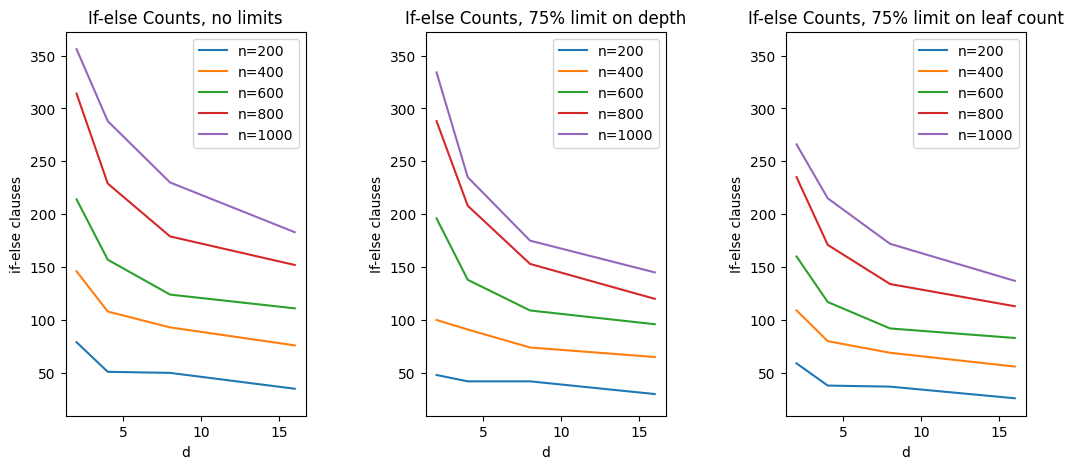

In [186]:
ax1 = plt.subplot(1, 3, 1)
for i in range(len(if_else_counts)):
  plt.plot(d_vals, if_else_counts[i], label="n="+str(n_vals[i]))
plt.legend()
plt.xlabel('d')
plt.ylabel('if-else clauses')
plt.title("If-else Counts, no limits")

plt.subplot(1, 3, 2, sharey=ax1)
for i in range(len(if_else_counts_reduceded_depth)):
  plt.plot(d_vals, if_else_counts_reduceded_depth[i], label="n="+str(n_vals[i]))
plt.legend()
plt.xlabel('d')
plt.ylabel('If-else clauses')
plt.title("If-else Counts, 75% limit on depth")

plt.subplot(1, 3, 3, sharey=ax1)
for i in range(len(if_else_counts_reduceded_leaves)):
  plt.plot(d_vals, if_else_counts_reduceded_leaves[i], label="n="+str(n_vals[i]))
plt.legend()
plt.xlabel('d')
plt.ylabel('If-else clauses')
plt.title("If-else Counts, 75% limit on leaf count")

plt.subplots_adjust(left=0,
                    bottom=0.1,
                    right=1.5,
                    top=0.9,
                    wspace=0.5,
                    hspace=0.4)

For each particular number of instances, increasing the number of input columns corresponded to a decrease in required number of if-else statements. This would make sense since it is easier to partition with hyperplanes when our dimensionalty is high.

In the experimentation cases, both limits posed on the number of leaf nodes and on maximum depthlead lead to decrease in the number of if-else statements required (especially in lower dimensionality). While this does come with a cost of acccuracy, using 75% of leaf_nodes/max_depth required to achieve 100% accuracy does achieve some reduction in if-else statements while achiveing decent accruacy (>90% for most cases).

# 6.3.A

In [243]:
import zlib
import string
import random

random.seed(2)
string_len = 10000

test_str =''.join(random.choices(string.ascii_lowercase, k=string_len))
compressed_str = zlib.compress(test_str.encode())
assert(zlib.decompress(compressed_str).decode() == test_str)

print(f"String len: {len(test_str)}, Compressed len: {len(compressed_str)}, ratio {len(test_str)/len(compressed_str)}")

String len: 10000, Compressed len: 6256, ratio 1.5984654731457801


#6.3.B

In [240]:
import math

input_information = string_len * math.ceil(- math.log(1/len(string.ascii_lowercase), 2))
output_len = input_information / math.ceil(- math.log(1/(2**8), 2))
ratio_upper_limit = string_len / output_len
print("Upper limit of compression ratio: ", ratio_upper_limit)

Upper limit of compression ratio:  1.6


For an algorithm to be lossless, it means that we cannot lose information when encoding and decoding. This means that the self-information of the compressed string needs to be at least the information contained in the input string. Thus, we can calculate ratio with the following process:

\begin{equation}
\text{input_len} * ⌈-log_2{\frac{1}{26}}⌉ = k * \lceil-log_2{\frac{1}{256}\rceil} \\
\frac{\text{input_len}}{k} =  \frac{log_2{256}}{\lceil log_2{26}\rceil} = \frac{8}{5}
\end{equation}

Note that 26 comes from the alphabet size of the input string, and 256 is the alphabet size of the compressed string (represented as bytes).

#8.1 A.)

MEC = 4 * 3 + min(3 * 4, 3) + min(4, 3) = 12 + 3 + 3 = 18 bit

#8.1 B.)

MEC = 3 + 4 + 4 = 11 bits

#8.1 C.)

Network A.) can memorize 18 rows and network B.) can memorize 11 rows.

#8.1 D)

4-class means that each result requires 2 bits to memorize. This means that network A.) can now memorize 9 rows and network B.) can memorize 5 rows.